## Data Science Example

https://code.visualstudio.com/docs/python/data-science-tutorial

In [ ]:

import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

Exploritory plotting


<AxesSubplot:xlabel='survived', ylabel='fare'>

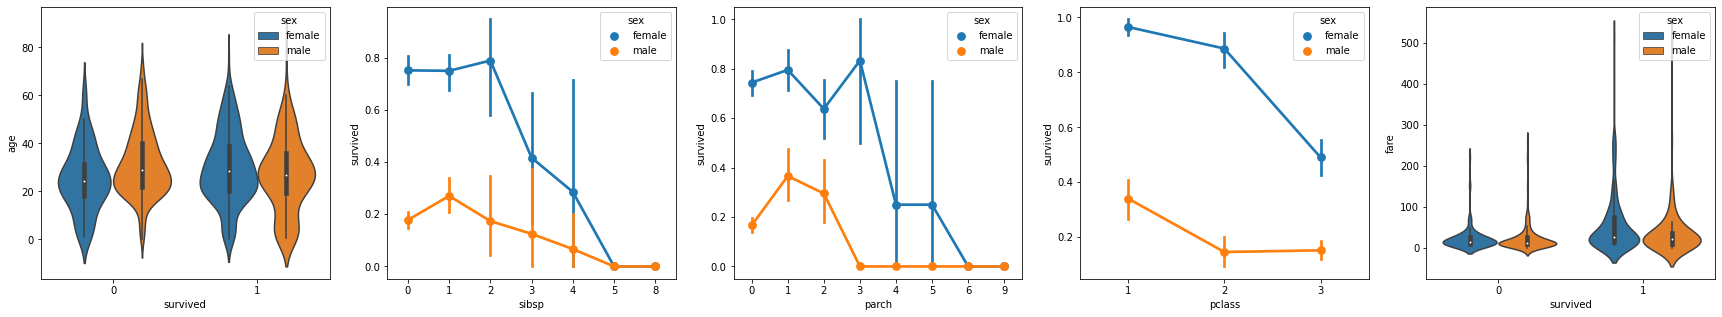

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

Calculate correlations

In [8]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


Combine sibling/spouse (sibsp) and parents/children (parch) will have nore power if combined,  Combine them in a variable called relatives.
See how if a person had relatives, versus how many relatives, there is a higher correlation with survival. 

In [9]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


now drop from the dataset the low value sibsp and parch columns, as well as any rows that had NaN values, to end up with a dataset that can be used for training a model.

In [10]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

# Train and Evaluate a model - sklearn

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

normalize the inputs such that all features are treated equally

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### Fit Naive Bayes model

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Try it against the test data set that was held back from training. Add and run the following code to predict the outcome of the test data and calculate the accuracy of the model.

In [14]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


# Train and evaluate a model - Keras
use the Keras library with TensorFlow to construct the neural network

use a Sequential neural network, which is a layered neural network wherein there are multiple layers that feed into each other in sequence.

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

Add the layers of the neural network. For now, let's keep things simple and just use three layers
- The first layer will be set to have a dimension of 5, since you have 5 inputs: sex, pclass, age, relatives, and fare.
- The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
- The middle layer was kept at 5 for simplicity, although that value could have been different.

rectified linear unit (relu) activation function is used as a good general activation function for the first two layers, while the sigmoid activation function is required for the final layer as the output you want (of whether a passenger survives or not) needs to be scaled in the range of 0-1 (the probability of a passenger surviving).

In [21]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


Once the model is created, it needs to be compiled. As part of this, you need to define what type of optimizer will be used, how loss will be calculated, and what metric should be optimized for

In [23]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5825
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5957
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.7177
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.7691
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.7691
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7691
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.7739
Epoch 9/50
27/27 [==============================] - 0s 926us/step - loss: 0.5620 - accuracy: 0.7739
Epoch 10/50
27/27 [==============================] - 0s 963us/step - loss: 0.5394 - accuracy: 0.7715
Epoch 11/50
27/

With the model built and trained its now time to see how it performs against the test data.

In [24]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.7799043062200957
